# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
from scipy import stats as st

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
users = pd.read_csv('megaline_users.csv')
calls = pd.read_csv('megaline_calls.csv')
messages = pd.read_csv('megaline_messages.csv')
internet = pd.read_csv('megaline_internet.csv')
plans = pd.read_csv('megaline_plans.csv')

## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas

plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<span style="color:blue">Todo se ve en orden con la tabla de tarifas. No hay valores ausentes, errores en los encabezados de columna o tipos de datos inadecuados. No realizaré ninguna modificación o corrección. </span>


<div class="alert alert-block alert-info">
<b>El cobro de internet excedente se realiza con base en gigabytes, por el momento mantendré la columna de mb incluidos para que más adelante, cuando fusione las tablas, obtenga la resta con los mb usados por cada usuario, ya que están en las mismas unidades.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-info">
<b>No hace falta analizar duplicados en esta tabla, ya que solo son dos filas. </b> <a class="tocSkip"></a>

## Enriquecer los datos

## Usuarios/as

In [5]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Imprime una muestra de datos para usuarios

users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [7]:
# Investigo sobre valores duplicados

users.duplicated().sum()

0

<span style="color:blue">No hay valores ausentes, más que en la columna churn_date, donde hay 466 valores nulos; tampoco hay errores en los encabezados de columna. Las fechas en las columnas reg_date y churn_date se guardaron como object, por lo que procederé a cambiarlos a tipo datetime.
No voy a eliminar los valores ausentes por el momento. </span>


<div class="alert alert-block alert-info">
<b>Sobre los 34 valores no nulos de la columna 'churn_rate', se trata de clientes que habían cancelado su plan para el momento en que se realizó la selección de la muestra para el análisis, por lo tanto, los 466 valores nulos son clientes con un plan tarifario vigente. </b> <a class="tocSkip"></a>

<div class="alert alert-block alert-info">
<b>No hay valores totalmente duplicados en esta tabla.</b> <a class="tocSkip"></a>

### Corregir los datos

In [8]:
# Cambio los datos de tipo object a datetime en las columnas reg_date y churn_date

users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

# Muestro la información general de la tabla para verificar el cambio 

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriquecer los datos

## Llamadas

In [9]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
# Investigo un poco sobre los valores de la tabla 

calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [11]:
# Investigo un poco más sobre las llamadas con duración 0:
# ¿se trata de llamadas que duraron unos pocos segundos y por eso aparecen como 0 minutos?
# o ¿se trata de clientes que no realizaron llamadas en ese mes? 

# Filtro las llamadas de 1 segundo
display(calls.query('duration == 0.01'))

#Filtro las llamadas de 0 segundos
calls.query('duration == 0')

,id,user_id,call_date,duration
1697,1009_119,1009,2018-11-27,0.01
3354,1011_207,1011,2018-11-26,0.01
7806,1036_398,1036,2018-10-11,0.01
12532,1054_259,1054,2018-12-14,0.01
15975,1062_215,1062,2018-05-16,0.01
20230,1077_197,1077,2018-08-23,0.01
24754,1095_56,1095,2018-07-25,0.01
26879,1101_206,1101,2018-06-19,0.01
29577,1112_102,1112,2018-11-11,0.01
32092,1120_538,1120,2018-11-09,0.01


,id,user_id,call_date,duration
19,1001_4,1001,2018-12-05,0.0
25,1001_13,1001,2018-12-24,0.0
31,1001_30,1001,2018-10-17,0.0
32,1001_31,1001,2018-11-03,0.0
34,1001_35,1001,2018-12-21,0.0
...,...,...,...,...
137714,1499_183,1499,2018-11-10,0.0
137715,1499_184,1499,2018-09-15,0.0
137720,1499_189,1499,2018-12-27,0.0
137722,1499_191,1499,2018-12-24,0.0


In [12]:
# Imprime una muestra de datos para las llamadas

calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [13]:
# Investigo sobre valores duplicados

calls.duplicated().sum()

0

<span style="color:blue">No hay valores ausentes o errores en los encabezados de columna. Las fechas en la columna call_date se guardaron como object, por lo que procederé a cambiarlos a tipo datetime. De acuerdo a la descripción de las tarifas, las llamadas se redondean hacia arriba, incluso las de un segundo, por lo que crearé una columna que redondee los valores de 'duration'. También crearé una columna que extraiga el mes de 'call_date' porque más adelante voy a utilizarlo. </span>

<div class="alert alert-block alert-info">
<b> Hay llamadas con duración de 0 minutos, pero también hay llamadas con duración de 0.01 minutos, por lo que las primeras deben tratarse de clientes que no realizaron ninguna llamada durante el mes en cuestión. </b> <a class="tocSkip"></a>

<div class="alert alert-block alert-info">
<b>No hay valores totalmente duplicados en esta tabla, aunque en la columna 'user_id' sí, ya que un mismo usuario puede realizar varias llamadas en el mes.</b> <a class="tocSkip"></a>

### Corregir los datos

In [14]:
# Cambio los datos de tipo object a datetime en la columna call_date

calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')

# Muestro la información general de la tabla para verificar el cambio 

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

In [15]:
# Agrego una columna que tome los valores de 'duration' y los redondee hacia arriba 

calls['total_duration'] = np.ceil(calls['duration'])

# Muestro el resultado

calls.head()

,id,user_id,call_date,duration,total_duration
0,1000_93,1000,2018-12-27,8.52,9.0
1,1000_145,1000,2018-12-27,13.66,14.0
2,1000_247,1000,2018-12-27,14.48,15.0
3,1000_309,1000,2018-12-28,5.76,6.0
4,1000_380,1000,2018-12-30,4.22,5.0


In [16]:
# Creo una columna que extraiga el mes de 'call_date'

calls['month'] = calls['call_date'].dt.month

calls.head()

,id,user_id,call_date,duration,total_duration,month
0,1000_93,1000,2018-12-27,8.52,9.0,12
1,1000_145,1000,2018-12-27,13.66,14.0,12
2,1000_247,1000,2018-12-27,14.48,15.0,12
3,1000_309,1000,2018-12-28,5.76,6.0,12
4,1000_380,1000,2018-12-30,4.22,5.0,12


In [17]:
# Verifico si las llamadas de 1 segundo también se redondearon a 1 minuto

calls.query('duration == 0.01')

,id,user_id,call_date,duration,total_duration,month
1697,1009_119,1009,2018-11-27,0.01,1.0,11
3354,1011_207,1011,2018-11-26,0.01,1.0,11
7806,1036_398,1036,2018-10-11,0.01,1.0,10
12532,1054_259,1054,2018-12-14,0.01,1.0,12
15975,1062_215,1062,2018-05-16,0.01,1.0,5
20230,1077_197,1077,2018-08-23,0.01,1.0,8
24754,1095_56,1095,2018-07-25,0.01,1.0,7
26879,1101_206,1101,2018-06-19,0.01,1.0,6
29577,1112_102,1112,2018-11-11,0.01,1.0,11
32092,1120_538,1120,2018-11-09,0.01,1.0,11


## Mensajes

In [18]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [19]:
# Imprime una muestra de datos para los mensajes

messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [20]:
# Investigo sobre valores duplicados

messages.duplicated().sum()

0

<span style="color:blue">No hay valores ausentes o errores en los encabezados de columna. Las fechas en la columna message_date se guardaron como object, por lo que procederé a cambiarlos a tipo datetime. Crearé una columna que extraiga el mes de la columna 'message_date' porque lo usaré más adelante. </span>

<div class="alert alert-block alert-info">
<b>No hay valores totalmente duplicados en esta tabla, aunque sí lo hay en la columna 'user_id', pero eso es porque un mismo usuario pudo enviar varios mensajes durante el mes.</b> <a class="tocSkip"></a>

### Corregir los datos

In [21]:
# Cambio los datos de tipo object a datetime en la columna message_date

messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')

# Muestro la información general de la tabla para verificar el cambio 

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

In [22]:
# Creo una columna que extraiga el mes de 'message_date'

messages['month'] = messages['message_date'].dt.month

messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


## Internet

In [23]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [24]:
# Imprime una muestra de datos para el tráfico de internet

internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [25]:
# Investigo sobre valores duplicados

internet.duplicated().sum()

0

<span style="color:blue">No hay valores ausentes o errores en los encabezados de columna. Las fechas en la columna session_date se guardaron como object, por lo que procederé a cambiarlos a tipo datetime. Crearé una columna que extraiga el mes de cada sesión, para los análisis posteriores. </span>

<div class="alert alert-block alert-info">
<b>En este momento no realizaré el redondeo hacia arriba de los mb usados, ya que la descripción de las tarifas menciona que las sesiones web individuales no se redondean, pero sí el total mensual, por lo que el redondeo lo realizaré hasta hacer la agrupación por usuario y mes. Posteriormente, ese valor redondeado mensual, lo usaré para compararlo con los mb incluídos en el plan contratado, lo convertiré a gigabytes y lo redondearé hacia arriba también. </b> <a class="tocSkip"></a>

<div class="alert alert-block alert-info">
<b>No hay valores totalmente duplicados en esta tabla, aunque sí lo hay en la columna 'user_id', y eso es porque un mismo usuario puede tener varias sesiones de internet.</b> <a class="tocSkip"></a>

### Corregir los datos

In [26]:
# Cambio los datos de tipo object a datetime en la columna session_date

internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

# Muestro la información general de la tabla para verificar el cambio 

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

In [27]:
# Creo una columna que extraiga el mes de 'session_date'

internet['month'] = internet['session_date'].dt.month

internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


## Estudiar las condiciones de las tarifas

In [28]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

In [29]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

# Muestro las primeras filas del dataframe para recordar

calls.head()

,id,user_id,call_date,duration,total_duration,month
0,1000_93,1000,2018-12-27,8.52,9.0,12
1,1000_145,1000,2018-12-27,13.66,14.0,12
2,1000_247,1000,2018-12-27,14.48,15.0,12
3,1000_309,1000,2018-12-28,5.76,6.0,12
4,1000_380,1000,2018-12-30,4.22,5.0,12


In [30]:
# Agrupo por usuario y mes y cuento las filas de la columna total_duration

calls_by_user = calls.groupby(['user_id', 'month'])['total_duration'].count().reset_index()

# Muestro el resultado 

calls_by_user

,user_id,month,total_duration
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [31]:
# Cambio el nombre la columna por una que exprese mejor los datos 

calls_by_user.rename(columns={'total_duration': 'total_calls'}, inplace=True)

# Verifico el resultado

calls_by_user.head()

,user_id,month,total_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [32]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

# Agrupo por usuario y mes y sumo los datos de la columna total_duration

min_by_user = calls.groupby(['user_id', 'month'])['total_duration'].sum().reset_index()

# Cambio el nombre de la columna total_duration por una más apropiada

min_by_user.rename(columns={'total_duration': 'total_minutes'}, inplace=True)

# Muestro el resultado 

min_by_user

,user_id,month,total_minutes
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0
...,...,...,...
2253,1498,12,339.0
2254,1499,9,346.0
2255,1499,10,385.0
2256,1499,11,308.0


In [33]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

# Muestro las primeras filas del dataframe para recordar

messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


In [34]:
# Agrupo por usuario y cuento las filas de 'message_date'

message_by_user = messages.groupby(['user_id', 'month'])['message_date'].count().reset_index()

# Cambio el nombre de la columna message_date por uno más apropiado

message_by_user.rename(columns={'message_date': 'total_messages'}, inplace=True)

# Muestro el resultado

message_by_user

,user_id,month,total_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [35]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

# Muestro el dataframe para recordarlo

internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [36]:
# Agrupo por usuario y mes y sumo las filas de 'mb_used'

mb_by_user = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

# Muestro el resultado

mb_by_user

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


In [37]:
# Redondeo hacia arriba los datos de la columna 'mb_used'

mb_by_user['mb_used'] = np.ceil(mb_by_user['mb_used'])

mb_by_user

,user_id,month,mb_used
0,1000,12,1902.0
1,1001,8,6920.0
2,1001,9,13315.0
3,1001,10,22331.0
4,1001,11,18505.0
...,...,...,...
2272,1498,12,23138.0
2273,1499,9,12985.0
2274,1499,10,19493.0
2275,1499,11,16814.0


In [38]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

# Las tablas a fusionar son: calls_by_user, min_by_user, message_by_user, mb_by_user

# Realizaré la fusion de manera progresiva 

merge_1 = pd.merge(calls_by_user, min_by_user, on = ['user_id', 'month'])

merge_2 = pd.merge(merge_1, message_by_user, on = ['user_id', 'month'])

merge_3 = pd.merge(merge_2, mb_by_user, on = ['user_id', 'month'])

# Muestro resultado

merge_3

,user_id,month,total_calls,total_minutes,total_messages,mb_used
0,1000,12,16,124.0,11,1902.0
1,1001,8,27,182.0,30,6920.0
2,1001,9,49,315.0,44,13315.0
3,1001,10,65,393.0,53,22331.0
4,1001,11,64,426.0,36,18505.0
...,...,...,...,...,...,...
1754,1496,9,52,414.0,21,16390.0
1755,1496,10,46,317.0,18,14288.0
1756,1496,11,39,308.0,13,8548.0
1757,1496,12,40,294.0,11,16439.0


In [39]:
# Añade la información de la tarifa

# Muestro tabla de users que contiene los planes contratados por cada usuario

users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


In [40]:
# Extraigo las columnas user_id y plan, para posteriormente fusionarlas con el merge_3

plan_by_user = users.loc[:, ['user_id', 'plan']]

plan_by_user

,user_id,plan
0,1000,ultimate
1,1001,surf
2,1002,surf
3,1003,surf
4,1004,surf
...,...,...
495,1495,surf
496,1496,surf
497,1497,ultimate
498,1498,surf


In [41]:
# Fusionaré merge_3 con users, por 'user_id' y manteniendo solo la columna 'plan'

data_by_users = pd.merge(merge_3, plan_by_user, on = 'user_id')

# Muestro el resultado 

data_by_users

,user_id,month,total_calls,total_minutes,total_messages,mb_used,plan
0,1000,12,16,124.0,11,1902.0,ultimate
1,1001,8,27,182.0,30,6920.0,surf
2,1001,9,49,315.0,44,13315.0,surf
3,1001,10,65,393.0,53,22331.0,surf
4,1001,11,64,426.0,36,18505.0,surf
...,...,...,...,...,...,...,...
1754,1496,9,52,414.0,21,16390.0,surf
1755,1496,10,46,317.0,18,14288.0,surf
1756,1496,11,39,308.0,13,8548.0,surf
1757,1496,12,40,294.0,11,16439.0,surf


In [42]:
# Muestro de nuevo las tarifas 

plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [43]:
# Calcula el ingreso mensual para cada usuario

# Agregaré una columna de ingreso para cada componente del plan tarifario, posteriormente sumaré esas columnas para tener el total por mes

# Crearé una función para poder agregar las columnas de ingreso al dataframe

# Comenzaré con la función para ingreso por excedentes de llamdas 

def income_calls(row):
    """
    La funcion va a tomar como parámetro de entrada cada fila del dataframe data_by_users
    considerará el plan contratado y si hay una diferencia con los minutos incluidos en ese plan,
    en caso afirmativo, aplicará la cuota correspondiente a los minutos excedidos.
    
    """

    plan = row['plan']
    minutes = row['total_minutes']
    min_extra = 0
    cost_per_min = 0

    if plan == 'surf':
        if minutes > 500:
            min_extra = minutes - 500
            cost_per_min = min_extra * 0.03
    else:
        if minutes > 3000:
            min_extra = minutes - 3000
            cost_per_min = min_extra * 0.01

    return cost_per_min

# Creo la nueva columna aplicando la función creada

data_by_users['usd_extra_calls'] = data_by_users.apply(income_calls, axis = 1)

# Muestro el resultado

data_by_users


,user_id,month,total_calls,total_minutes,total_messages,mb_used,plan,usd_extra_calls
0,1000,12,16,124.0,11,1902.0,ultimate,0.0
1,1001,8,27,182.0,30,6920.0,surf,0.0
2,1001,9,49,315.0,44,13315.0,surf,0.0
3,1001,10,65,393.0,53,22331.0,surf,0.0
4,1001,11,64,426.0,36,18505.0,surf,0.0
...,...,...,...,...,...,...,...,...
1754,1496,9,52,414.0,21,16390.0,surf,0.0
1755,1496,10,46,317.0,18,14288.0,surf,0.0
1756,1496,11,39,308.0,13,8548.0,surf,0.0
1757,1496,12,40,294.0,11,16439.0,surf,0.0


In [44]:
# Función para ingreso por excedentes de mensajes 

def income_messages(row):
    """
    La funcion va a tomar como parámetro de entrada cada fila del dataframe data_by_users
    considerará el plan contratado y si hay una diferencia con los mensajes incluidos en ese plan,
    en caso afirmativo, aplicará la cuota correspondiente a los mensajes excedidos.
    
    """

    plan = row['plan']
    messages = row['total_messages']
    message_extra = 0
    cost_per_messages = 0

    if plan == 'surf':
        if messages > 50:
            message_extra = messages - 50
            cost_per_messages = message_extra * 0.03
    else:
        if messages > 1000:
            message_extra = messages - 1000
            cost_per_messages = message_extra * 0.01

    return cost_per_messages

# Creo la nueva columna aplicando la función creada

data_by_users['usd_extra_message'] = data_by_users.apply(income_messages, axis = 1)

# Muestro el resultado

data_by_users

,user_id,month,total_calls,total_minutes,total_messages,mb_used,plan,usd_extra_calls,usd_extra_message
0,1000,12,16,124.0,11,1902.0,ultimate,0.0,0.00
1,1001,8,27,182.0,30,6920.0,surf,0.0,0.00
2,1001,9,49,315.0,44,13315.0,surf,0.0,0.00
3,1001,10,65,393.0,53,22331.0,surf,0.0,0.09
4,1001,11,64,426.0,36,18505.0,surf,0.0,0.00
...,...,...,...,...,...,...,...,...,...
1754,1496,9,52,414.0,21,16390.0,surf,0.0,0.00
1755,1496,10,46,317.0,18,14288.0,surf,0.0,0.00
1756,1496,11,39,308.0,13,8548.0,surf,0.0,0.00
1757,1496,12,40,294.0,11,16439.0,surf,0.0,0.00


In [45]:
# Función para ingreso por excedentes de megabytes

def income_mb(row):
    """
    La funcion va a tomar como parámetro de entrada cada fila del dataframe data_by_users,
    considerará el plan contratado y si hay una diferencia con los megabytes incluidos en ese plan,
    en caso afirmativo redonderá la diferencia hacia el entero superior y aplicará la cuota correspondiente.
    
    """

    plan = row['plan']
    mb = row['mb_used']
    mb_extra = 0
    gb_extra = 0
    cost_per_gb = 0

    if plan == 'surf':
        if mb > 15360:
            mb_extra = mb - 15360
            gb_extra = np.ceil(mb_extra/1024)
            cost_per_gb = gb_extra * 10
    else:
        if mb > 30720:
            mb_extra = mb - 30720
            gb_extra = np.ceil(mb_extra/1024)
            cost_per_gb = gb_extra * 7

    return cost_per_gb

# Creo la nueva columna aplicando la función creada

data_by_users['usd_extra_gb'] = data_by_users.apply(income_mb, axis = 1)

# Muestro el resultado

data_by_users

,user_id,month,total_calls,total_minutes,total_messages,mb_used,plan,usd_extra_calls,usd_extra_message,usd_extra_gb
0,1000,12,16,124.0,11,1902.0,ultimate,0.0,0.00,0.0
1,1001,8,27,182.0,30,6920.0,surf,0.0,0.00,0.0
2,1001,9,49,315.0,44,13315.0,surf,0.0,0.00,0.0
3,1001,10,65,393.0,53,22331.0,surf,0.0,0.09,70.0
4,1001,11,64,426.0,36,18505.0,surf,0.0,0.00,40.0
...,...,...,...,...,...,...,...,...,...,...
1754,1496,9,52,414.0,21,16390.0,surf,0.0,0.00,20.0
1755,1496,10,46,317.0,18,14288.0,surf,0.0,0.00,0.0
1756,1496,11,39,308.0,13,8548.0,surf,0.0,0.00,0.0
1757,1496,12,40,294.0,11,16439.0,surf,0.0,0.00,20.0


In [46]:
# Función para ingreso por plan tarifario

def income_plan(row):
    """
    La funcion va a tomar como parámetro de entrada cada fila del dataframe data_by_users,
    considerará el plan contratado y regresará el costo del plan correspondiente.
    
    """

    plan = row['plan']

    if plan == 'surf':
        return 20
    else:
        return 70

# Creo la nueva columna aplicando la función creada

data_by_users['usd_monthly_pay'] = data_by_users.apply(income_plan, axis = 1)

# Muestro el resultado

data_by_users

,user_id,month,total_calls,total_minutes,total_messages,mb_used,plan,usd_extra_calls,usd_extra_message,usd_extra_gb,usd_monthly_pay
0,1000,12,16,124.0,11,1902.0,ultimate,0.0,0.00,0.0,70
1,1001,8,27,182.0,30,6920.0,surf,0.0,0.00,0.0,20
2,1001,9,49,315.0,44,13315.0,surf,0.0,0.00,0.0,20
3,1001,10,65,393.0,53,22331.0,surf,0.0,0.09,70.0,20
4,1001,11,64,426.0,36,18505.0,surf,0.0,0.00,40.0,20
...,...,...,...,...,...,...,...,...,...,...,...
1754,1496,9,52,414.0,21,16390.0,surf,0.0,0.00,20.0,20
1755,1496,10,46,317.0,18,14288.0,surf,0.0,0.00,0.0,20
1756,1496,11,39,308.0,13,8548.0,surf,0.0,0.00,0.0,20
1757,1496,12,40,294.0,11,16439.0,surf,0.0,0.00,20.0,20


In [47]:
# Función para ingreso mensual por usuario 

def total_income(row):
    """
    La funcion va a tomar como parámetro de entrada cada fila del dataframe data_by_users,
    sumará los valores de las columnas usd_extra_calls, usd_extra_message, usd_extra_gb y usd_monthly_pay
    y devolverá el total.
    
    """

    calls = row['usd_extra_calls']
    message = row['usd_extra_message']
    gb = row['usd_extra_gb']
    plan = row['usd_monthly_pay']

    total = calls + message + gb + plan

    return total

# Creo la nueva columna aplicando la función creada

data_by_users['total_income'] = data_by_users.apply(total_income, axis = 1)

# Muestro el resultado

data_by_users


,user_id,month,total_calls,total_minutes,total_messages,mb_used,plan,usd_extra_calls,usd_extra_message,usd_extra_gb,usd_monthly_pay,total_income
0,1000,12,16,124.0,11,1902.0,ultimate,0.0,0.00,0.0,70,70.00
1,1001,8,27,182.0,30,6920.0,surf,0.0,0.00,0.0,20,20.00
2,1001,9,49,315.0,44,13315.0,surf,0.0,0.00,0.0,20,20.00
3,1001,10,65,393.0,53,22331.0,surf,0.0,0.09,70.0,20,90.09
4,1001,11,64,426.0,36,18505.0,surf,0.0,0.00,40.0,20,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1754,1496,9,52,414.0,21,16390.0,surf,0.0,0.00,20.0,20,40.00
1755,1496,10,46,317.0,18,14288.0,surf,0.0,0.00,0.0,20,20.00
1756,1496,11,39,308.0,13,8548.0,surf,0.0,0.00,0.0,20,20.00
1757,1496,12,40,294.0,11,16439.0,surf,0.0,0.00,20.0,20,40.00


## Estudia el comportamiento de usuario

### Llamadas

In [48]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Crearé una tabla dinamica para unir los planes tarifarios por mes y calcular los promedios de los minutos 

minutes_by_plan = data_by_users.pivot_table(index = 'month',
                          columns = 'plan',
                          values = 'total_minutes',
                          aggfunc = 'mean'
                         )

# Muestro la tabla

minutes_by_plan

plan,surf,ultimate
month,,
1,292.000000,197.666667
2,331.200000,486.800000
3,344.937500,415.285714
4,366.228571,322.750000
5,443.981132,410.190476
6,425.514286,370.918919
7,452.101124,439.638298
8,427.873950,436.438596
9,426.020408,437.591549


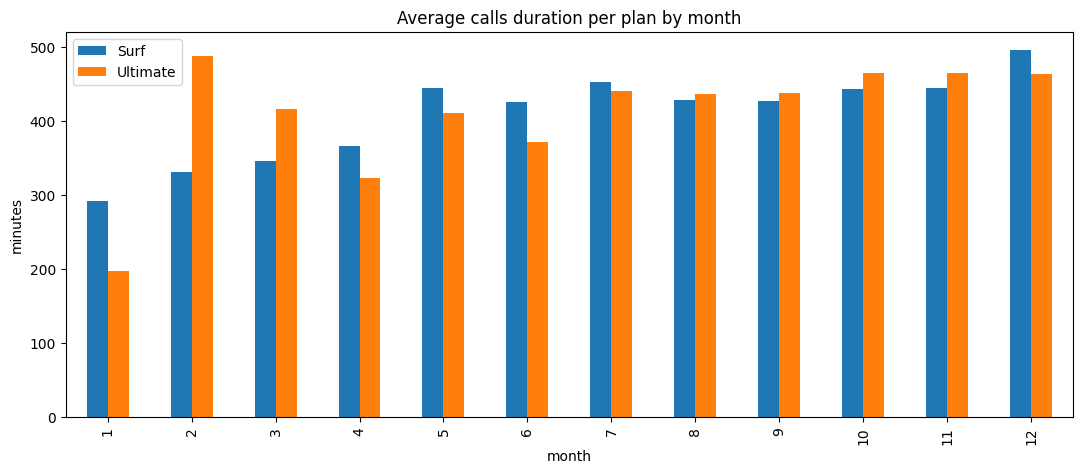

In [49]:
# Creo la grafica de barras para la tabla anterior

minutes_by_plan.plot(kind = 'bar',  
                    title = 'Average calls duration per plan by month',
                    xlabel = 'month',
                    ylabel = 'minutes',
                    figsize = [13,5])

plt.legend(['Surf','Ultimate'])
plt.show()

In [50]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Creo una tabla para cada plan.

# Plan Surf

surf = data_by_users.query("plan == 'surf'")

# Plan Ultimate

ultimate = data_by_users.query("plan == 'ultimate'")

# Muestro las tablas 

display(surf, ultimate)

,user_id,month,total_calls,total_minutes,total_messages,mb_used,plan,usd_extra_calls,usd_extra_message,usd_extra_gb,usd_monthly_pay,total_income
1,1001,8,27,182.0,30,6920.0,surf,0.0,0.00,0.0,20,20.00
2,1001,9,49,315.0,44,13315.0,surf,0.0,0.00,0.0,20,20.00
3,1001,10,65,393.0,53,22331.0,surf,0.0,0.09,70.0,20,90.09
4,1001,11,64,426.0,36,18505.0,surf,0.0,0.00,40.0,20,60.00
5,1001,12,56,412.0,44,19370.0,surf,0.0,0.00,40.0,20,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1753,1496,8,18,122.0,2,8606.0,surf,0.0,0.00,0.0,20,20.00
1754,1496,9,52,414.0,21,16390.0,surf,0.0,0.00,20.0,20,40.00
1755,1496,10,46,317.0,18,14288.0,surf,0.0,0.00,0.0,20,20.00
1756,1496,11,39,308.0,13,8548.0,surf,0.0,0.00,0.0,20,20.00


,user_id,month,total_calls,total_minutes,total_messages,mb_used,plan,usd_extra_calls,usd_extra_message,usd_extra_gb,usd_monthly_pay,total_income
0,1000,12,16,124.0,11,1902.0,ultimate,0.0,0.0,0.0,70,70.0
19,1006,11,2,10.0,15,2069.0,ultimate,0.0,0.0,0.0,70,70.0
20,1006,12,9,59.0,139,32119.0,ultimate,0.0,0.0,14.0,70,84.0
26,1008,10,71,476.0,21,17107.0,ultimate,0.0,0.0,0.0,70,70.0
27,1008,11,63,446.0,37,23677.0,ultimate,0.0,0.0,0.0,70,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1714,1478,12,58,376.0,14,22561.0,ultimate,0.0,0.0,0.0,70,70.0
1718,1482,11,115,785.0,87,20246.0,ultimate,0.0,0.0,0.0,70,70.0
1719,1482,12,5,56.0,5,561.0,ultimate,0.0,0.0,0.0,70,70.0
1730,1487,12,56,416.0,66,13993.0,ultimate,0.0,0.0,0.0,70,70.0


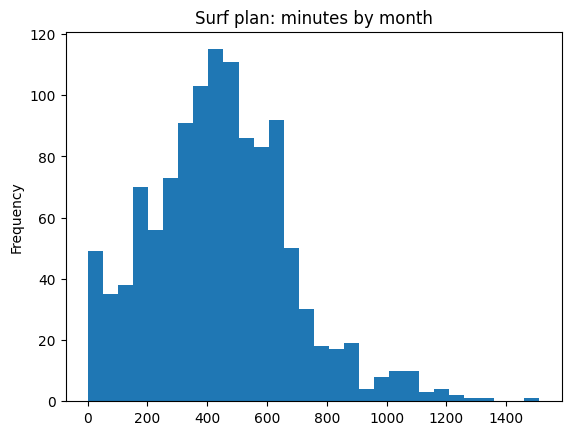

In [51]:
# Histograma para el plan surf

surf['total_minutes'].plot(kind = 'hist', bins = 30, title = 'Surf plan: minutes by month')

plt.show()

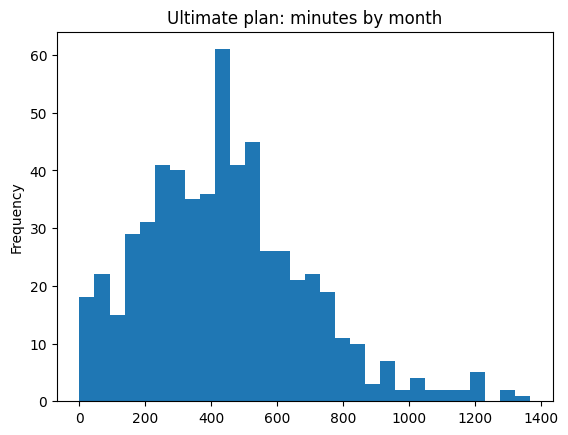

In [52]:
# Histograma para el plan ultimate

ultimate['total_minutes'].plot(kind = 'hist', bins = 30, title = 'Ultimate plan: minutes by month')

plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [53]:
# Calcula la media y la varianza de la duración mensual de llamadas.

# Plan surf
print('Surf calls'), 
print('mean:', surf['total_minutes'].mean())
print('var:', np.var(surf['total_minutes']))

print()

# Plan ultimate

print('Ultimate calls'), 
print('mean:', ultimate['total_minutes'].mean())
print('var:', np.var(ultimate['total_minutes']))

Surf calls
mean: 445.77542372881356
var: 55274.530073972994

Ultimate calls
mean: 442.51295336787564
var: 62180.81978039679


<Axes: ylabel='total_minutes'>

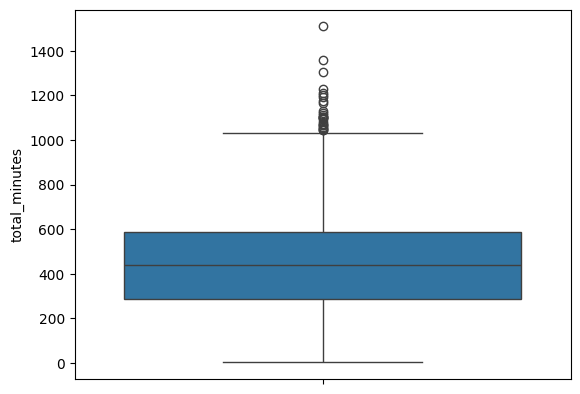

In [54]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

# Diagrama de cada para el plan Surf

sns.boxplot(surf['total_minutes'])

<Axes: ylabel='total_minutes'>

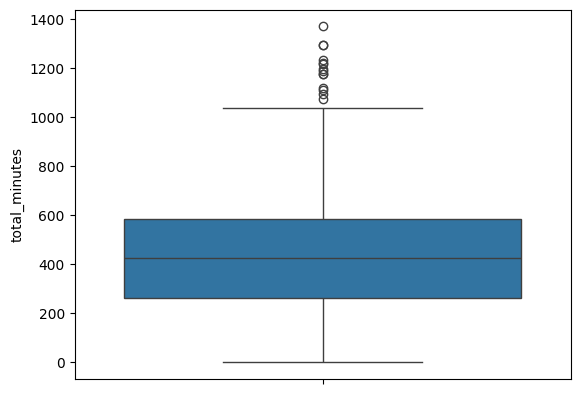

In [55]:
# Diagrama de cada para el plan Ultimate

sns.boxplot(ultimate['total_minutes'])

<span style="color:blue"> En el gráfico de barras se observa una tendencia similar a través de los meses, incrementandose la duración promedio de las llamadas conforme avanza el año, para cada uno de los planes. Eso puede deberse a que la cantidad de usuarios con un plan contratado crece y no necesariamente a un aumento en la duración de las llamadas realizadas. </span>

<span style="color:blue"> En los histogramas y los diagramas de caja y bigotes, se observan medianas cercanas a los 450 minutos, además de cuartiles en valores muy similares y una ligera asimetría positiva en ambos. También hay frecuencias más altas en el histograma del plan Surf, pero eso se debe a que hay más usuarios en ese plan. </span>

<span style="color:blue"> Parece que el comportamiento de los usuarios, en cuanto a duración de llamadas, no varía en función del plan. </span>

### Mensajes

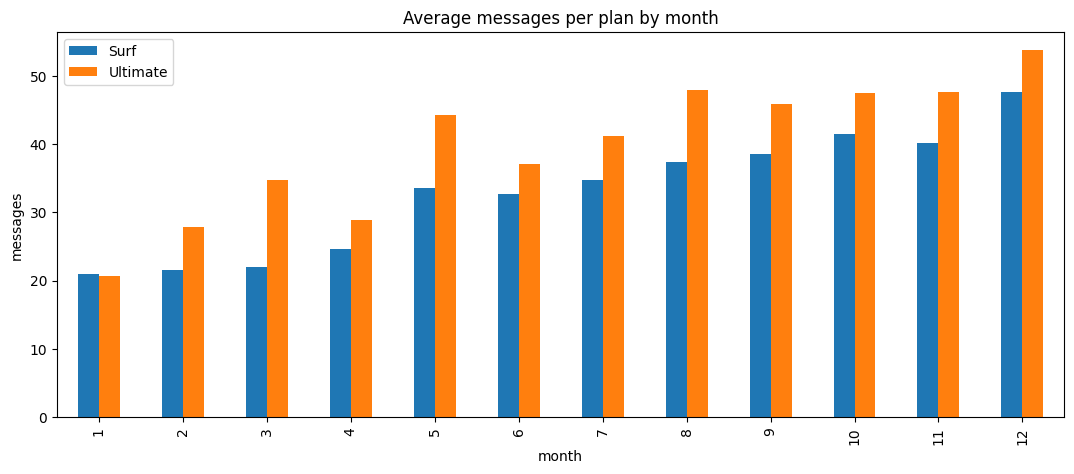

In [56]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

# Creare un gráfico de barras para observar el envío de mensajes por mes. 

# Primero crearé una tabla dinamica para unir los planes tarifarios por mes y calcular los promedios de los mensajes enviados 

messages_by_plan = data_by_users.pivot_table(index = 'month',
                          columns = 'plan',
                          values = 'total_messages',
                          aggfunc = 'mean'
                         )

# Gráfico de barras

messages_by_plan.plot(kind = 'bar',  
                    title = 'Average messages per plan by month',
                    xlabel = 'month',
                    ylabel = 'messages',
                    figsize = [13,5])

plt.legend(['Surf','Ultimate'])
plt.show()

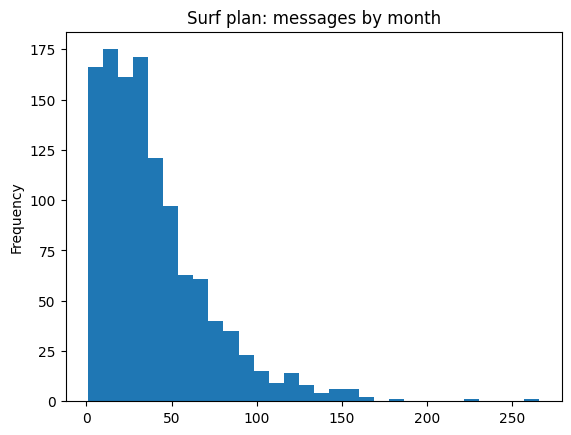

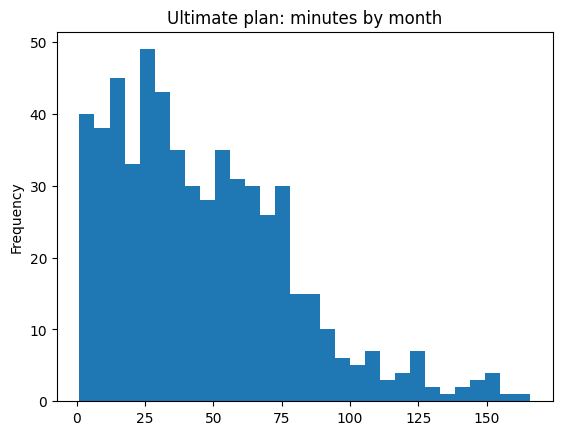

In [57]:
# Usando las tablas por plan, trazaré un histograma para los mensajes totales ('total_messages')

# Plan Surf

surf['total_messages'].plot(kind = 'hist', bins = 30, title = 'Surf plan: messages by month')

plt.show()

# Plan Ultimate

ultimate['total_messages'].plot(kind = 'hist', bins = 30, title = 'Ultimate plan: minutes by month')

plt.show()


In [58]:
# Calculo la media y la varianza para los mensajes enviados de cada plan 

# Plan surf
print('Surf messages'), 
print('mean:', surf['total_messages'].mean())
print('var:', np.var(surf['total_messages']))

print()

# Plan ultimate

print('Ultimate calls'), 
print('mean:', ultimate['total_messages'].mean())
print('var:', np.var(ultimate['total_messages']))

Surf messages
mean: 39.489830508474576
var: 1043.3329474288998

Ultimate calls
mean: 46.4559585492228
var: 1082.5209446338606


<Axes: ylabel='total_messages'>

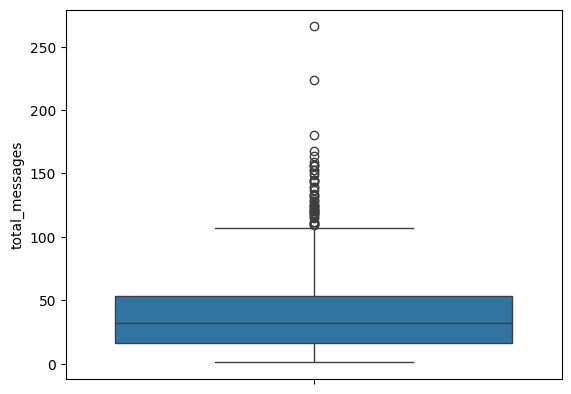

In [59]:
# Diagrama de caja y bigotes para cada plan

# Plan Surf

sns.boxplot(surf['total_messages'])

<Axes: ylabel='total_messages'>

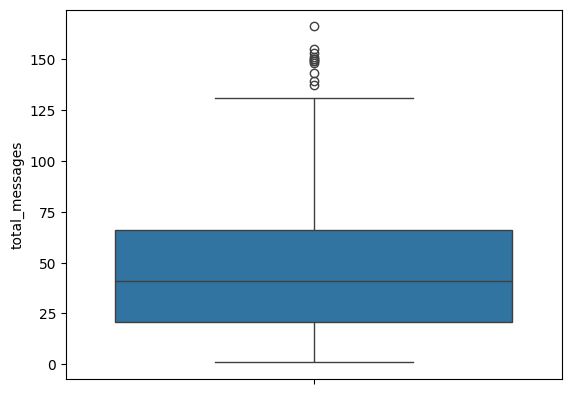

In [60]:
# Diagrama de caja para el plan Ultimate

sns.boxplot(ultimate['total_messages'])

<span style="color:blue"> En el gráfico de barras se observa un promedio de mensajes enviados mayor en el plan Ultimate que en el Surf. La diferencia se mantiene a lo largo del año. </span>

<span style="color:blue"> En los histogramas y los diagramas de caja y bigotes, para el plan Surf, los cuartiles Q1 al Q3 se concentran en menos de 50 mensajes, mientras que, para el plan Ultimate, el 50% de los datos se concentran entre 25 y 75 mensajes. </span>

<span style="color:blue"> Parece que el comportamiento de los usuarios, en cuanto a envío de mensajes, sí varía en función del plan, siendo mayor para el plan Ultimate. </span>

### Internet

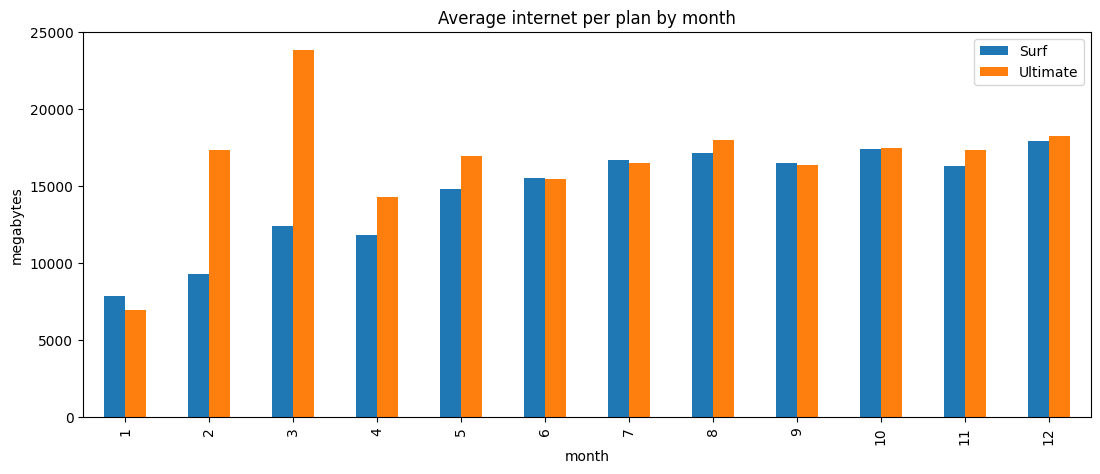

In [61]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

# Creare un gráfico de barras para observar los mb usados por mes. 

# Primero crearé una tabla dinamica para unir los planes tarifarios por mes y calcular los promedios de los mb utilizados 

mb_by_plan = data_by_users.pivot_table(index = 'month',
                          columns = 'plan',
                          values = 'mb_used',
                          aggfunc = 'mean'
                         )

# Gráfico de barras

mb_by_plan.plot(kind = 'bar',  
                    title = 'Average internet per plan by month',
                    xlabel = 'month',
                    ylabel = 'megabytes',
                    figsize = [13,5])

plt.legend(['Surf','Ultimate'])
plt.show()

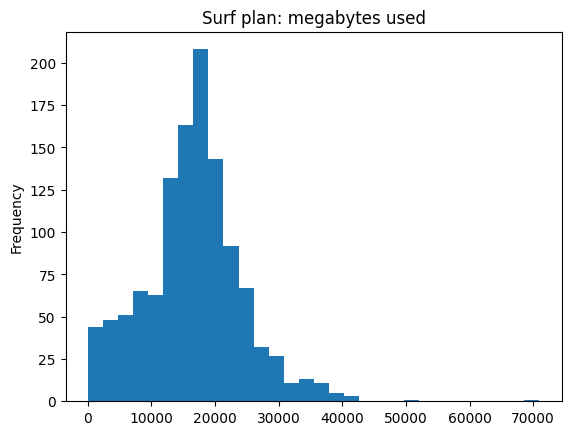

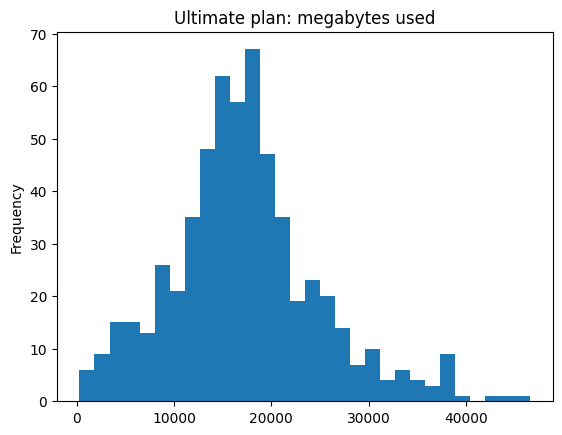

In [62]:
# Usando las tablas por plan, trazaré un histograma para los megabytes usados ('mb_used')

# Plan Surf

surf['mb_used'].plot(kind = 'hist', bins = 30, title = 'Surf plan: megabytes used')

plt.show()

# Plan Ultimate

ultimate['mb_used'].plot(kind = 'hist', bins = 30, title = 'Ultimate plan: megabytes used')

plt.show()


In [63]:
# Calculo la media y la varianza para los megabytes usados en cada plan 

# Plan surf
print('Surf mb used'), 
print('mean:', surf['mb_used'].mean())
print('var:', np.var(surf['mb_used']))

print()

# Plan ultimate

print('Ultimate mb used'), 
print('mean:', ultimate['mb_used'].mean())
print('var:', np.var(ultimate['mb_used']))

Surf mb used
mean: 16629.51694915254
var: 59459655.473441534

Ultimate mb used
mean: 17251.488773747842
var: 58988250.536575176


<Axes: ylabel='mb_used'>

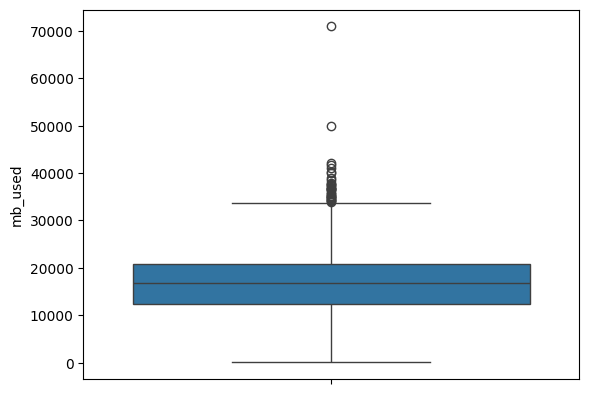

In [64]:
# Diagrama de caja y bigotes para cada plan

# Plan Surf

sns.boxplot(surf['mb_used'])

<Axes: ylabel='mb_used'>

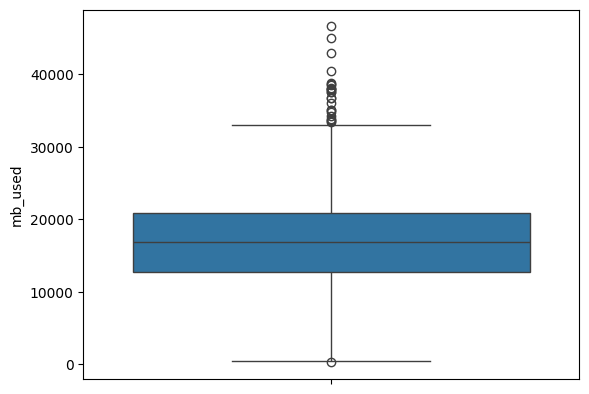

In [65]:
# Diagrama de caja para el plan Ultimate

sns.boxplot(ultimate['mb_used'])

<span style="color:blue"> En el gráfico de barras se observa una tendencia similar a través de los meses, incrementandose la duración promedio de las llamadas conforme avanza el año, para cada uno de los planes, con excepción de los meses febrero y marzo, donde los datos usados en el plan Ultimate fueron muy superiores. </span>

<span style="color:blue"> En los histogramas y los diagramas de caja y bigotes, se observan medianas y cuartiles en valores muy similares. Se diferencia principalmente por valores atipicos más altos en el plan Surf. </span>

<span style="color:blue"> Parece que el comportamiento de los usuarios, en cuanto a uso de internet, no varía en función del plan. </span>

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

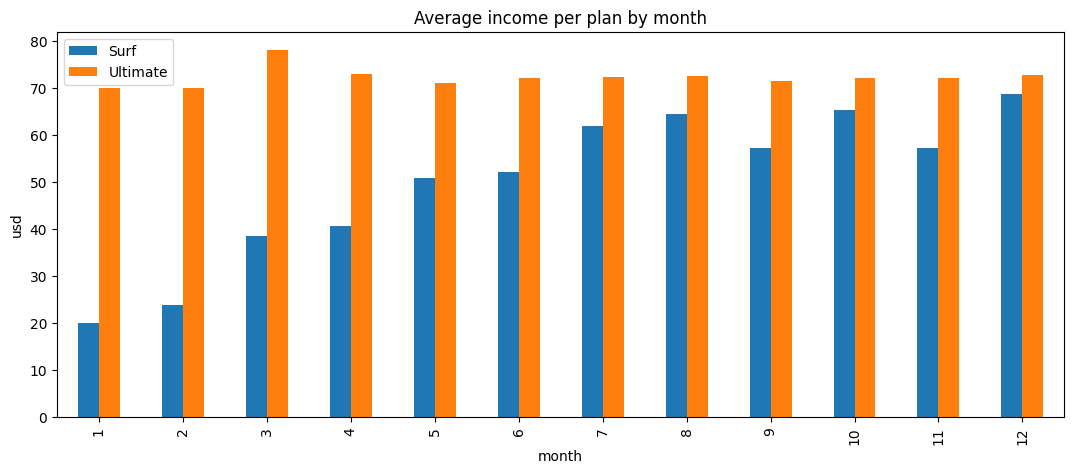

In [66]:
# Creare un gráfico de barras para observar el comportamiento de los ingresos por mes. 

# Primero crearé una tabla dinamica para unir los planes tarifarios por mes y calcular los promedios de los ingresos 

income_by_plan = data_by_users.pivot_table(index = 'month',
                          columns = 'plan',
                          values = 'total_income',
                          aggfunc = 'mean'
                         )

# Gráfico de barras

income_by_plan.plot(kind = 'bar',  
                    title = 'Average income per plan by month',
                    xlabel = 'month',
                    ylabel = 'usd',
                    figsize = [13,5])

plt.legend(['Surf','Ultimate'])
plt.show()

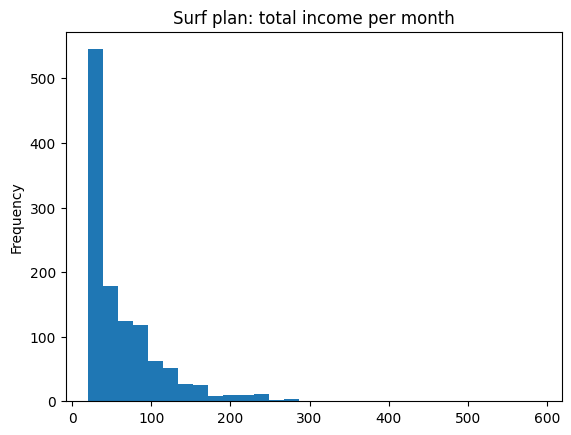

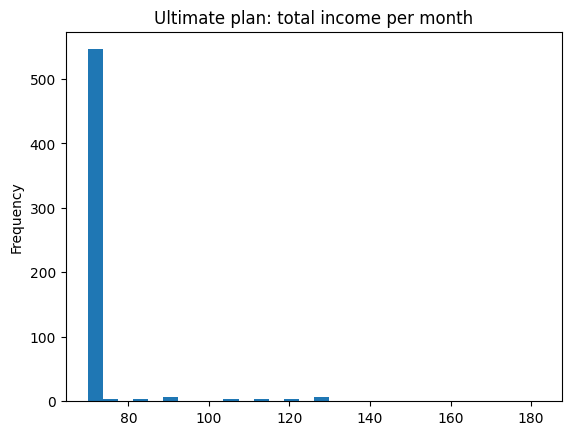

In [67]:
# Usando las tablas por plan, trazaré un histograma para los ingresos por mes 

# Plan Surf

surf['total_income'].plot(kind = 'hist', bins = 30, title = 'Surf plan: total income per month')

plt.show()

# Plan Ultimate

ultimate['total_income'].plot(kind = 'hist', bins = 30, title = 'Ultimate plan: total income per month')

plt.show()


In [68]:
# Calculo la media y la varianza para los ingresos por cada plan 

# Plan surf
print('Surf income per month'), 
print('mean:', surf['total_income'].mean())
print('var:', np.var(surf['total_income']))

print()

# Plan ultimate

print('Ultimate income per month'), 
print('mean:', ultimate['total_income'].mean())
print('var:', np.var(ultimate['total_income']))

Surf income per month
mean: 60.41583898305085
var: 2870.0688905672937

Ultimate income per month
mean: 72.24870466321244
var: 121.5478178385102


<Axes: ylabel='total_income'>

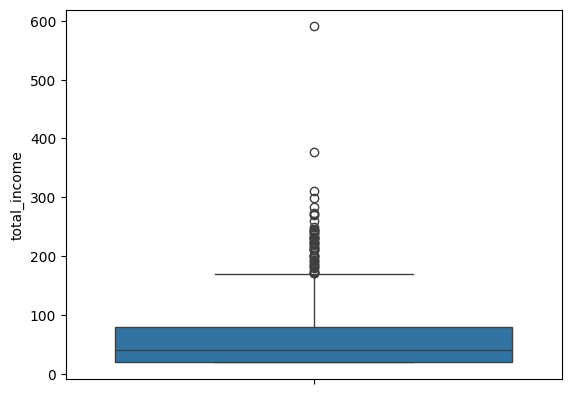

In [69]:
# Diagrama de caja y bigotes para cada plan

# Plan Surf

sns.boxplot(surf['total_income'])

<Axes: ylabel='total_income'>

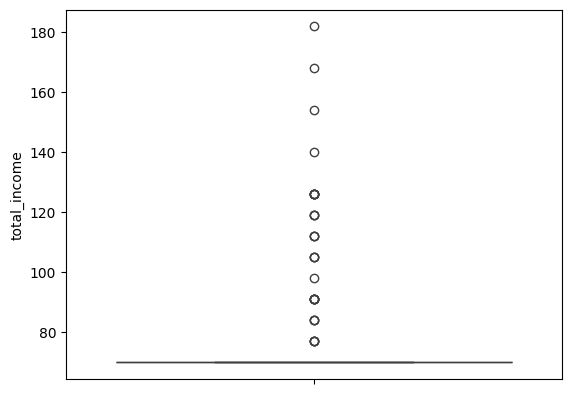

In [70]:
# Diagrama de caja para el plan Ultimate

sns.boxplot(ultimate['total_income'])

<span style="color:blue"> En el gráfico de barras se observa constantemente un ingreso promedio mensual superior proveniente de los usuarios del plan Ultimate. </span>

<span style="color:blue"> En los histogramas y los diagramas de caja y bigotes, se observa una mayor distribución de los ingresos provenientes de los usuarios del plan Surf, además de un ingreso promedio de 60 dólares, mientras que, para los usuarios del plan Ultimate, casi la totalidad de los ingresos se concentran cercanos a 70 dólares, que es el precio del plan mensual. </span>

<span style="color:blue"> Parece que el comportamiento de los ingresos varía para cada plan, aunque los ingresos promedio mensuales provenientes del plan Ultimate son mayores, casi la totalidad de los usuarios paga solo su cuota mensual, mientras que los usuarios del plan Surf pagan en promedio 3 veces el costo de su plan. </span>

## Prueba las hipótesis estadísticas

In [71]:
# Prueba las hipótesis

# Se realiza una prueba de dos colas, pues me interesa saber si los ingresos promedio son mayores o menores

# H0: los ingresos promedio proveninentes de los usuarios de los planes Ultimate y Surf son iguales
# HA: los ingresos promedio proveninentes de los usuarios de los planes Ultimate y Surf son diferentes


# Creo dos arrays, uno por plan, con los ingresos totales

surf_income = surf.loc[:, 'total_income']

ultimate_income = ultimate.loc[:, 'total_income']

# Prueba estadística ttest, para muestras independientes con varianzas diferentes (calculadas previamente)

alpha = 0.05 # utilizo un valor de significancia estándar, no tan riguroso

results = st.ttest_ind(surf_income, ultimate_income, equal_var = False) # prueba estadística para H0

print('valor p:', results.pvalue) # extraer el valor p

print()

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula: los ingresos promedio proveninentes de los usuarios de los planes Ultimate y Surf son diferentes')
else:
    print('No podemos rechazar la hipótesis nula: los ingresos promedio proveninentes de los usuarios de los planes Ultimate y Surf son iguales')

valor p: 5.756661975640558e-13

Rechazamos la hipótesis nula: los ingresos promedio proveninentes de los usuarios de los planes Ultimate y Surf son diferentes


In [72]:
# De la tabla users filtro por usuario y ciudad

user_by_city = users.loc[:, ['user_id','city']]

# Fusiono la tabla resultante con la tabla data_by_users

data_by_users = data_by_users.merge(user_by_city, on = 'user_id')

data_by_users

,user_id,month,total_calls,total_minutes,total_messages,mb_used,plan,usd_extra_calls,usd_extra_message,usd_extra_gb,usd_monthly_pay,total_income,city
0,1000,12,16,124.0,11,1902.0,ultimate,0.0,0.00,0.0,70,70.00,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,27,182.0,30,6920.0,surf,0.0,0.00,0.0,20,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,49,315.0,44,13315.0,surf,0.0,0.00,0.0,20,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,65,393.0,53,22331.0,surf,0.0,0.09,70.0,20,90.09,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,64,426.0,36,18505.0,surf,0.0,0.00,40.0,20,60.00,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,1496,9,52,414.0,21,16390.0,surf,0.0,0.00,20.0,20,40.00,"New Orleans-Metairie, LA MSA"
1755,1496,10,46,317.0,18,14288.0,surf,0.0,0.00,0.0,20,20.00,"New Orleans-Metairie, LA MSA"
1756,1496,11,39,308.0,13,8548.0,surf,0.0,0.00,0.0,20,20.00,"New Orleans-Metairie, LA MSA"
1757,1496,12,40,294.0,11,16439.0,surf,0.0,0.00,20.0,20,40.00,"New Orleans-Metairie, LA MSA"


In [73]:
# De la tabla anterior, creo dos dataframe: uno para los usuarios de la región NY - NJ y otro para los demás usuarios

users_NY_NJ = data_by_users.query("city == 'New York-Newark-Jersey City, NY-NJ-PA MSA'") # Region NY - NJ

users_remain = data_by_users.query("city != 'New York-Newark-Jersey City, NY-NJ-PA MSA'") # Resto de ciudades

# Extraigo unicamente la columna de ingresos para cada dataframe

# Usaré los dataframe como parámetros para la prueba estadística

users_NY_NJ_income = users_NY_NJ.loc[:, 'total_income']

users_remain_income = users_remain.loc[:, 'total_income']

# Calculo la varianza para cada grupo

print('NY_NJ var:', np.var(users_NY_NJ_income))
print()
print('Resto de ciudades var:', np.var(users_remain_income))

NY_NJ var: 1511.7844524787708

Resto de ciudades var: 2078.7421192976167


<span style="color:blue"> Las varianzas no están muy separadas, por lo que podría considerarlas como iguales para realizar la prueba de hipótesis. Para confirmar esto, realizaré una prueba de Levene. </span>

In [74]:
# Prueba de Levene

# H0: las varianzas de las regiones NY-NJ y el resto de las ciudades son iguales
# HA: las varianzas de las regiones NY-NJ y el resto de las ciudades son diferentes

alpha = 0.05

results = st.levene(users_NY_NJ_income, users_remain_income)

print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula: las varianzas de las regiones NY-NJ y el resto de las ciudades son diferentes')
else:
    print('No podemos rechazar la hipótesis nula: las varianzas de las regiones NY-NJ y el resto de las ciudades son iguales') 

valor p: 0.8434023289798585
No podemos rechazar la hipótesis nula: las varianzas de las regiones NY-NJ y el resto de las ciudades son iguales


In [75]:
# Prueba las hipótesis

# Se realiza una prueba de dos colas, pues me interesa saber si los ingresos promedio son mayores o menores

# H0: los ingresos promedio proveninentes de los usuarios de la region NY-NJ y el resto de ciudades son iguales
# HA: los ingresos promedio proveninentes de los usuarios de la region NY-NJ y el resto de ciudades son diferentes

# Prueba estadística ttest, para muestras independientes con varianzas similares (confirmado con la prueba de Levene)

alpha = 0.05 # utilizo un valor de significancia estándar, no tan riguroso

results = st.ttest_ind(users_NY_NJ_income, users_remain_income, equal_var = True) # prueba estadística para H0

print('valor p:', results.pvalue) # extraer el valor p

print()

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula: los ingresos promedio proveninentes de los usuarios de la region NY-NJ y el resto de ciudades son diferentes')
else:
    print('No podemos rechazar la hipótesis nula: los ingresos promedio proveninentes de los usuarios de la region NY-NJ y el resto de ciudades son iguales')

valor p: 0.010353440224856583

Rechazamos la hipótesis nula: los ingresos promedio proveninentes de los usuarios de la region NY-NJ y el resto de ciudades son diferentes


## Conclusión general

1. Desde el comienzo se consideraron las políticas de cobro de la compañía, respecto a los minutos, los mensajes o el internet, para agregar columnas que redondearan los valores respectivos.

2. En el análisis de gráficos, se encontraron patrones de comportamiento similares en cuanto al uso de llamadas, mensajes e internet, pero también una diferencia notable en cuanto a la distribución de los ingresos. Casi la totalidad de los usuarios del plan Ultimate pagan solo la cuota de su plan mensual, mientras que los usuarios del plan Surf realizan pagos distintos, en promedio 3 veces más que el costo de su plan mensual. Esto quiere decir que los usuarios subestiman la cantidad de datos, mensajes y llamadas que necesitan, contratando un plan que no satisface esas necesidades y, por lo tanto, haciendo pagos adicionales por cada servicio usado extra a lo contratado.

3. En las pruebas de hipótesis se rechazaron ambas hipótesis nulas, el ingreso promedio de los usuarios de cada plan es diferente y el de los usuarios de la región NY - NJ también lo es, respecto del resto de ciudades.

4. Derivado de las prubas de hipótesis y de la distribución de los ingresos por cada uno de los planes, se puede decir que el plan Surf es más rentable que el plan Ultimate. 